<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-18 14:42:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.9MB/s    in 3.4s    

2025-04-18 14:42:25 (59.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [10]:
import seaborn as sns

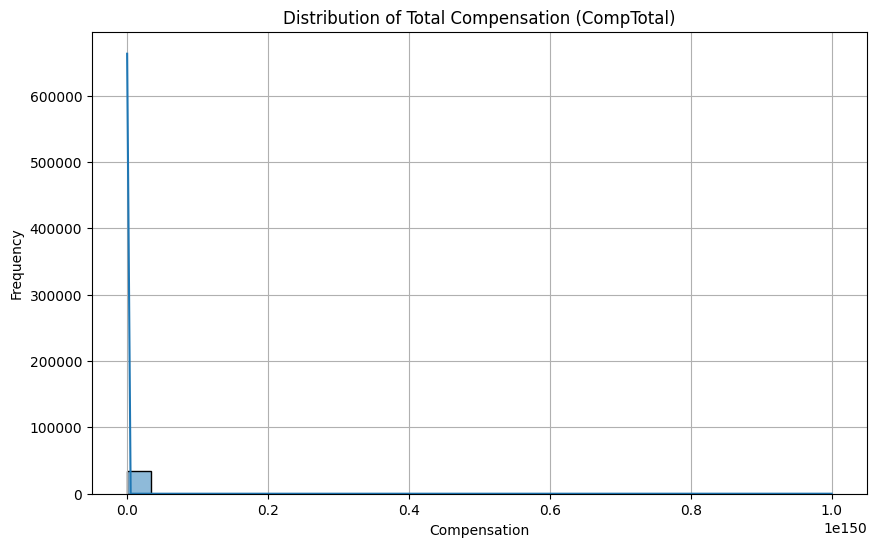

In [11]:
## Write your code here
# Query: Get compensation data
QUERY = """
SELECT CompTotal
FROM main
"""

comp_data = pd.read_sql_query(QUERY, conn)

# Drop missing values
comp_data = comp_data.dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(comp_data['CompTotal'], bins=30, kde=True)
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


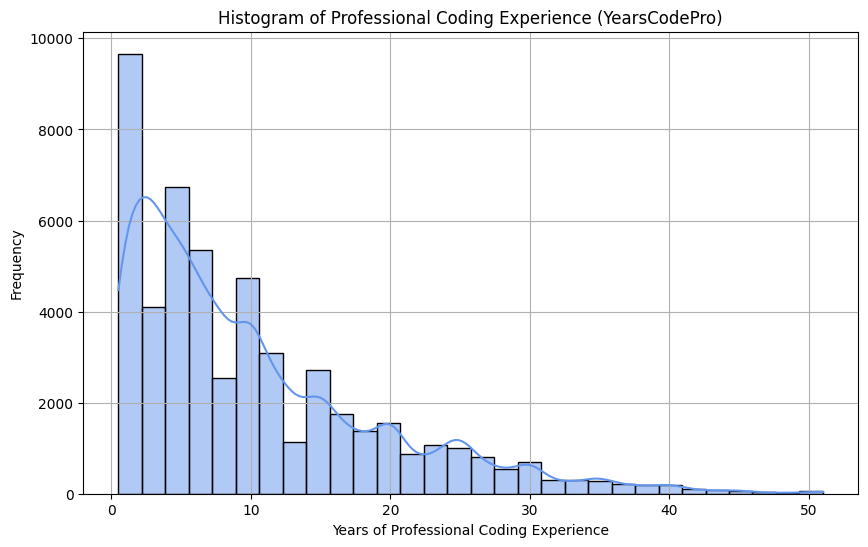

In [17]:
## Write your code here
# Query: Extract YearsCodePro
QUERY = """
SELECT YearsCodePro
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Convert string values like "Less than 1 year" and "More than 50 years"
def convert_years(val):
    if pd.isna(val):
        return None
    elif val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    else:
        try:
            return float(val)
        except:
            return None

data['YearsCodePro_num'] = data['YearsCodePro'].apply(convert_years)

# Drop missing values
cleaned_data = data.dropna(subset=['YearsCodePro_num'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['YearsCodePro_num'], bins=30, kde=True, color='cornflowerblue')
plt.title('Histogram of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_914/2419370043.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


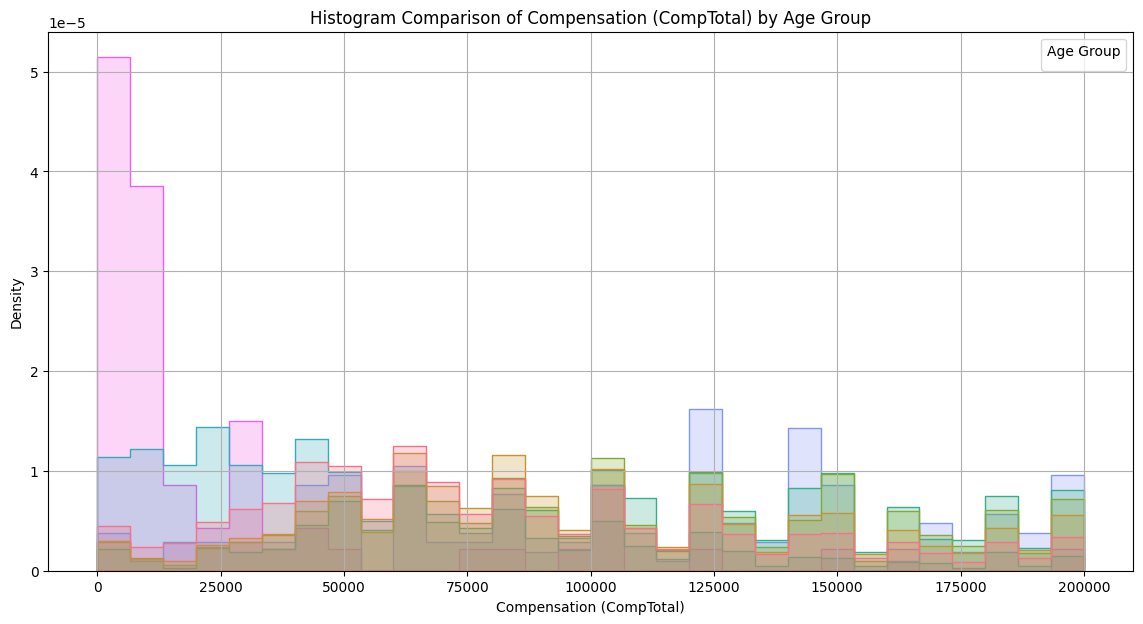

In [20]:
## Write your code here
# Query: Get Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Drop missing values
data = data.dropna(subset=['Age', 'CompTotal'])

# Filter only relevant Age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]
data = data[data['Age'].isin(age_order)]

# Filter out extreme compensation values (e.g. > $200,000)
data = data[data['CompTotal'] <= 200000]

# Plot histogram
plt.figure(figsize=(14, 7))
sns.histplot(
    data=data,
    x='CompTotal',
    hue='Age',
    element='step',
    stat='density',
    common_norm=False,
    palette='husl',
    bins=30  # You can change bin count as needed
)
plt.title('Histogram Comparison of Compensation (CompTotal) by Age Group')
plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Density')
plt.grid(True)
plt.legend(title='Age Group')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [ ]:
## Write your code here

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_914/2181171078.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=db_counts, x='Database', y='Count', palette='Set2')


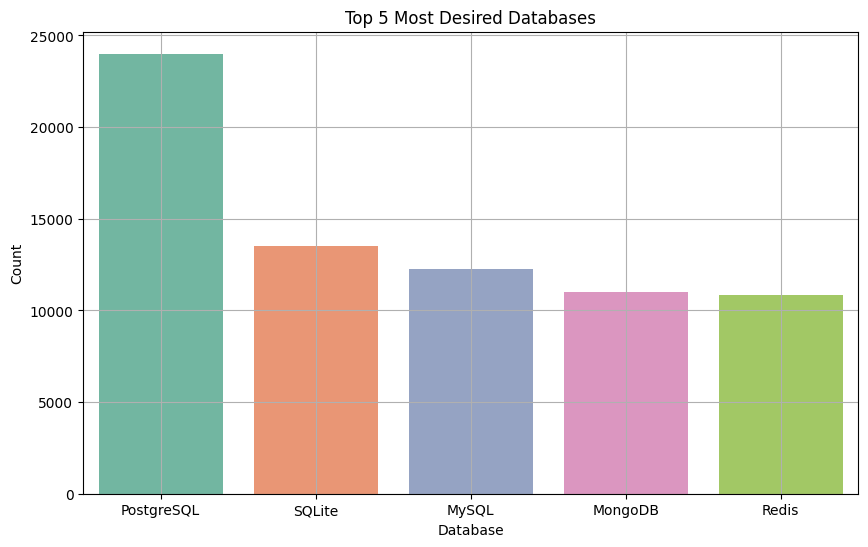

In [14]:
## Write your code here
# Query: Get count of desired databases
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""

db_data = pd.read_sql_query(QUERY, conn)

# Split multiple entries and count
from collections import Counter

all_dbs = db_data['DatabaseWantToWorkWith'].dropna().str.split(';')
flat_list = [db.strip() for sublist in all_dbs for db in sublist]
db_counts = pd.DataFrame(Counter(flat_list).most_common(5), columns=['Database', 'Count'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=db_counts, x='Database', y='Count', palette='Set2')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_914/2796078951.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_counts, x='Work Arrangement', y='Count', palette='pastel')


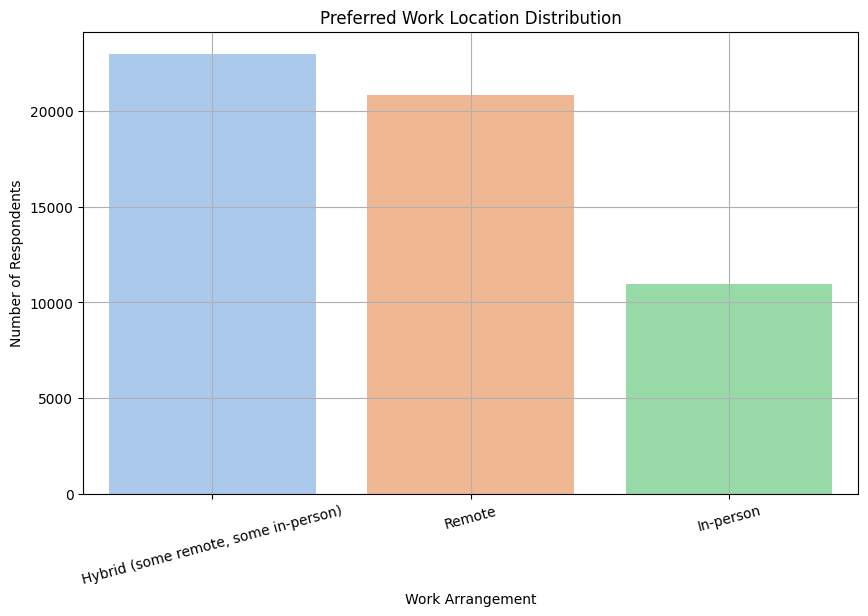

In [15]:
## Write your code here
# Query: Get RemoteWork column data
QUERY = """
SELECT RemoteWork
FROM main
"""

remote_data = pd.read_sql_query(QUERY, conn)

# Clean and count
remote_counts = remote_data['RemoteWork'].value_counts(dropna=False).reset_index()
remote_counts.columns = ['Work Arrangement', 'Count']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=remote_counts, x='Work Arrangement', y='Count', palette='pastel')
plt.title('Preferred Work Location Distribution')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


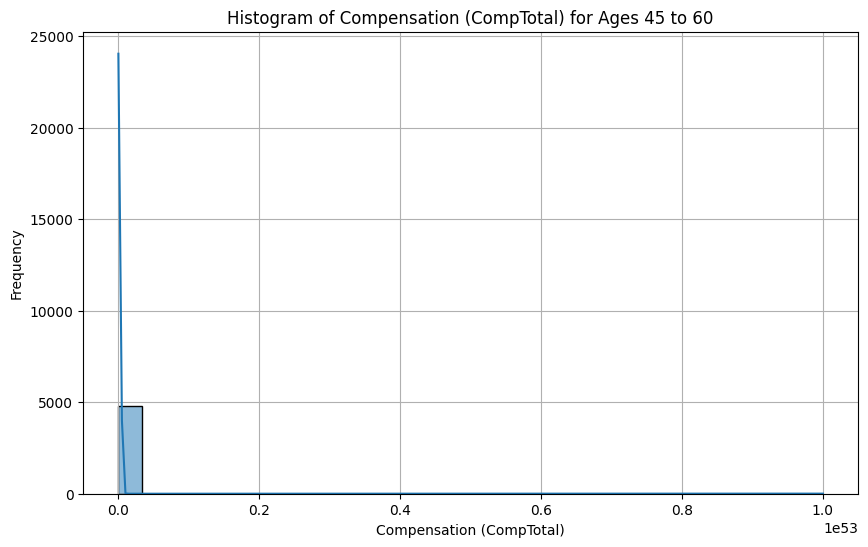

In [12]:
## Write your code here
# Query: Extract Age and CompTotal for age group 45 to 60
QUERY = """
SELECT Age, CompTotal
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Map age to numerical values
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

data['Age_num'] = data['Age'].map(age_map)

# Filter for age between 45 and 60
filtered_data = data[(data['Age_num'] >= 45) & (data['Age_num'] <= 60)]

# Drop missing values
filtered_data = filtered_data.dropna(subset=['CompTotal'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['CompTotal'], bins=30, kde=True)
plt.title('Histogram of Compensation (CompTotal) for Ages 45 to 60')
plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


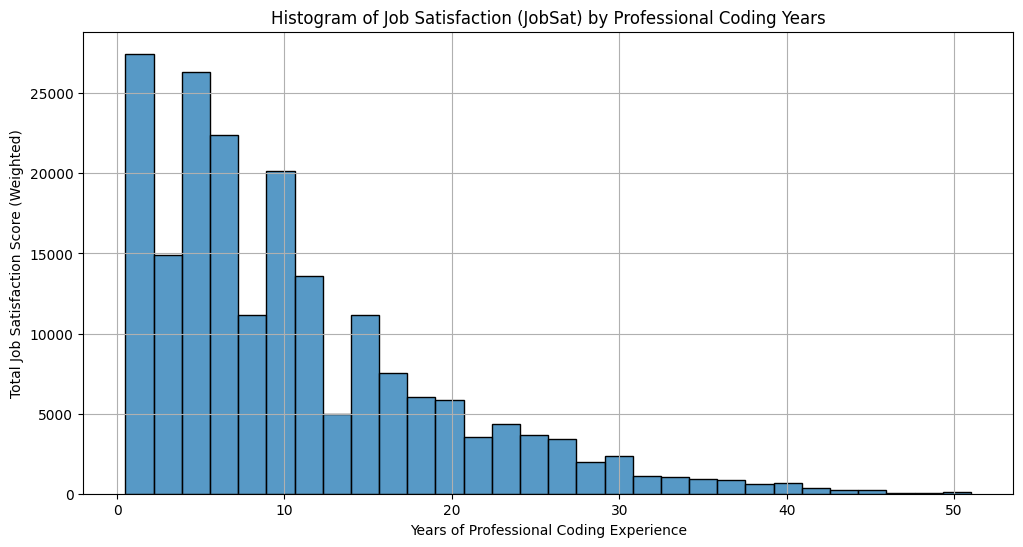

In [13]:
## Write your code here
# Query: Extract JobSat and YearsCodePro
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
"""

data = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric (some values may be 'Less than 1 year' or 'More than 50 years')
def convert_years(val):
    if pd.isna(val):
        return None
    elif val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    else:
        try:
            return float(val)
        except:
            return None

data['YearsCodePro_num'] = data['YearsCodePro'].apply(convert_years)

# Drop missing values
filtered_data = data.dropna(subset=['JobSat', 'YearsCodePro_num'])

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='YearsCodePro_num', weights='JobSat', bins=30, kde=False)
plt.title('Histogram of Job Satisfaction (JobSat) by Professional Coding Years')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Total Job Satisfaction Score (Weighted)')
plt.grid(True)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
